## Labwork 1: Histogram and Point Processing  

### Part 1. Use a pen and paper to do the following tasks:  

#### Task 1: Given the following image *I*:  

```
3 3 2
1 1 0
2 2 2
```

- Calculate and draw the histogram and normalized histogram of image *I*.  
- Calculate and display the negative image of *I*.  



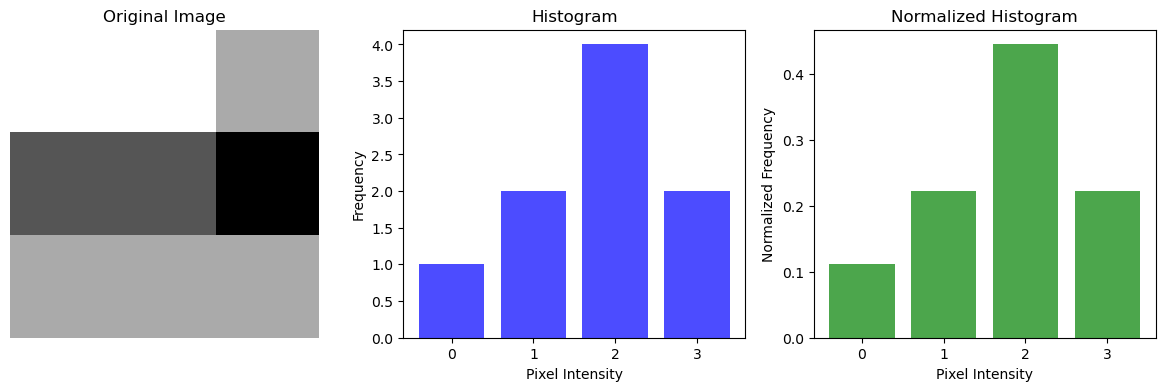

In [12]:
import numpy as np
import matplotlib.pyplot as plt

image = np.array([[3,3,2],
                 [1,1,0],
                 [2,2,2]])

hist_values, bin_edges = np.histogram(image,bins=range(5))

normalized_hist = hist_values / hist_values.sum()

negative_image = 3 - image

def plot_image_and_histograms(image):
    min_val, max_val = image.min(), image.max()
    bins = range(min_val, max_val + 2)  # +2 to include the max value
    hist_values, _ = np.histogram(image, bins=bins)

    # Normalize histogram
    normalized_hist = hist_values / hist_values.sum()

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Original Image
    axes[0].imshow(image, cmap='gray', vmin=min_val, vmax=max_val)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Histogram
    axes[1].bar(bins[:-1], hist_values, width=0.8, align='center', color='blue', alpha=0.7)
    axes[1].set_xticks(bins[:-1])
    axes[1].set_xlabel("Pixel Intensity")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title("Histogram")

    # Normalized Histogram
    axes[2].bar(bins[:-1], normalized_hist, width=0.8, align='center', color='green', alpha=0.7)
    axes[2].set_xticks(bins[:-1])
    axes[2].set_xlabel("Pixel Intensity")
    axes[2].set_ylabel("Normalized Frequency")
    axes[2].set_title("Normalized Histogram")

    plt.show()

plot_image_and_histograms(image)

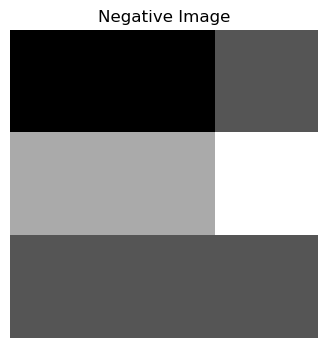

In [13]:
# Display negative image
plt.figure(figsize=(5,4))
plt.imshow(negative_image, cmap='gray', vmin=0, vmax=3)
plt.title("Negative Image")
plt.axis('off')
plt.show()

#### Task 2: Given the following image _J_:

```
0 2 1 7
3 2 5 2
1 1 7 6
5 0 0 3
```

- Calculate and draw the histogram and normalized histogram of image _J_.
- Convert image _J_ to a binary image called _B_ using the thresholding technique where the predefined threshold _k_ is the pixel that appears most frequently in the image.

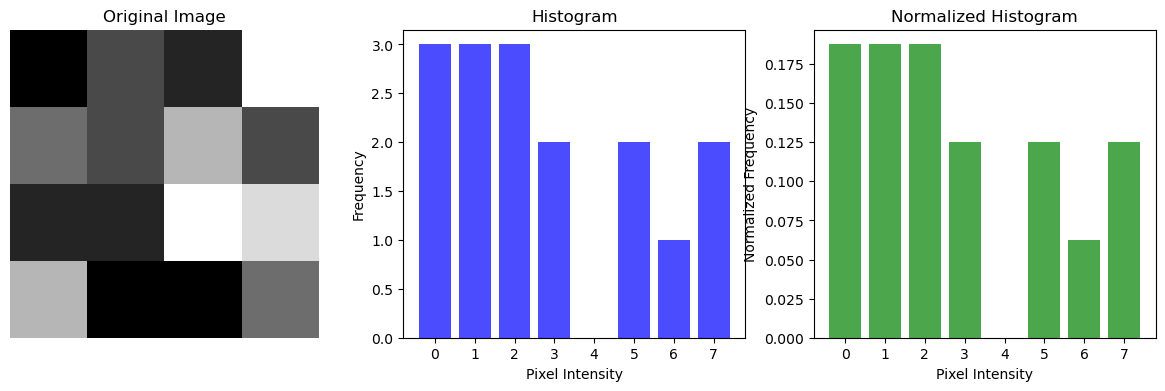

Most frequent pixel value (Threshold k): 2


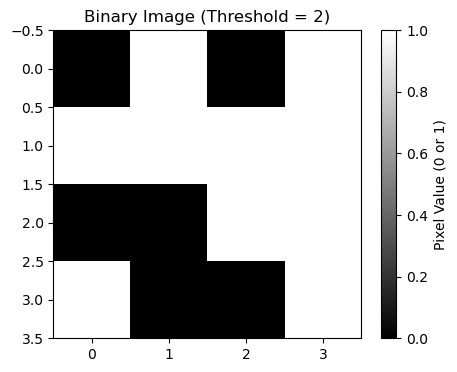

In [14]:
img2 = np.array([[0,2,1,7],
                [3,2,5,2],
                [1,1,7,6],
                [5,0,0,3]])

plot_image_and_histograms(img2)

# flattened = img2.flatten()
# counts = np.bincount(flattened) #count occurences
# print("Pixel counts:", dict(enumerate(counts)))
# threshold = np.argmax(counts) # find the pixel values with the highest count
threshold = 2
print(f"Most frequent pixel value (Threshold k): {threshold}")

#apply thresholding
binary_image = np.zeros_like(img2)
binary_image[img2>=threshold] = 1

plt.figure(figsize=(5,4))
plt.imshow(binary_image,cmap='gray',vmin=0,vmax=1)
plt.title(f'Binary Image (Threshold = {threshold})')
plt.colorbar(label="Pixel Value (0 or 1)")
plt.show()


#### Task 3: Given the following image _M_:

```
123 127 128 119 115 130
140 145 148 153 167 172
133 154 183 192 194 191
194 199 207 210 198 195
164 170 175 162 173 151
```

- Calculate and draw the histogram and normalized histogram of image _M_.
- Calculate and draw the equalized histogram from image _M_. From the equalized histogram, infer the new image called _N_.
- Convert image _M_ to a binary image called _B_ using the thresholding technique where the predefined threshold _k_ is the median of the pixels of image _M_.

---

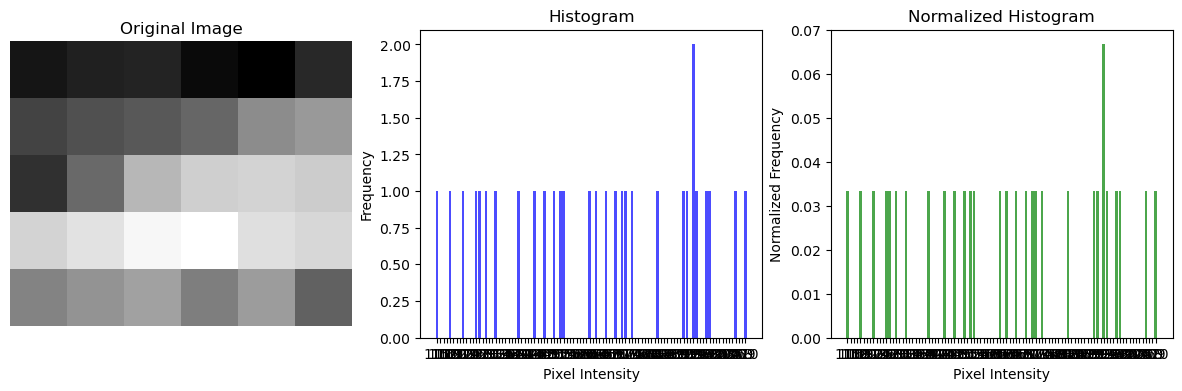

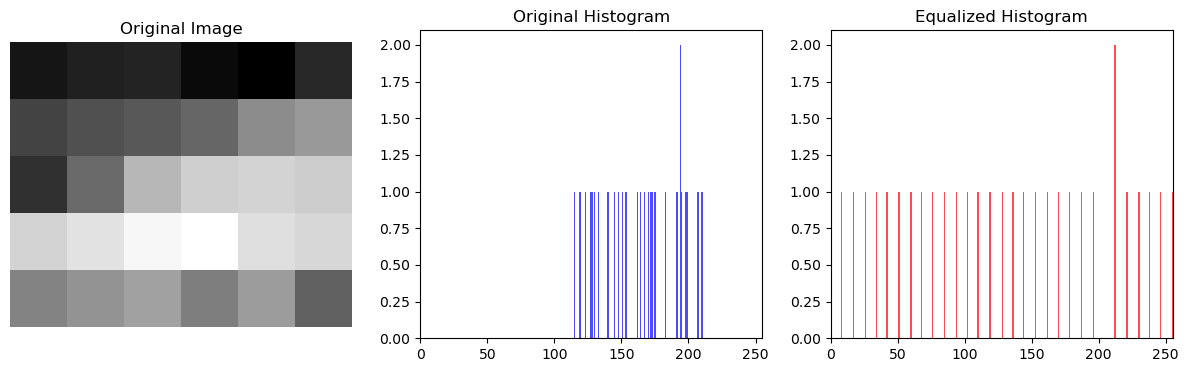

In [15]:
M = np.array([
    [123, 127, 128, 119, 115, 130],
    [140, 145, 148, 153, 167, 172],
    [133, 154, 183, 192, 194, 191],
    [194, 199, 207, 210, 198, 195],
    [164, 170, 175, 162, 173, 151]
])

plot_image_and_histograms(M)

# Calculate the histogram of the original image
hist, bins = np.histogram(M.flatten(), bins=range(0, 257))

# Compute the cumulative distribution function (CDF)
cdf = np.cumsum(hist)
cdf_normalized = cdf / cdf[-1]  # Normalize the CDF to [0, 1]

# Map the CDF values to the new pixel values
mapping = np.round(cdf_normalized * 255).astype(int)

# Apply the mapping to the original image M
N = mapping[M]

# Plot original and equalized histograms
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Original histogram
ax[0].imshow(M, cmap='gray', vmin=M.min(), vmax=M.max())
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].bar(bins[:-1], hist, width=1, color='blue', alpha=0.7)
ax[1].set_title("Original Histogram")
ax[1].set_xlim(0, 255)

# Equalized histogram
equalized_hist, _ = np.histogram(N.flatten(), bins=range(0, 257))
ax[2].bar(bins[:-1], equalized_hist, width=1, color='red', alpha=0.7)
ax[2].set_title("Equalized Histogram")
ax[2].set_xlim(0, 255)

plt.show()


### Part 2. Install Anaconda on your computer, then:

- Learn how to use OpenCV with Python in Anaconda.
- Use Jupyter Notebook as your editor.
- Download some greyscale images from the Internet, then perform the following image processing tasks using OpenCV and Python:

#### Task 1: Read the downloaded images

- Use `cv2.imread()` to read the images.
- Display the images using the `imshow()` function from `matplotlib`.

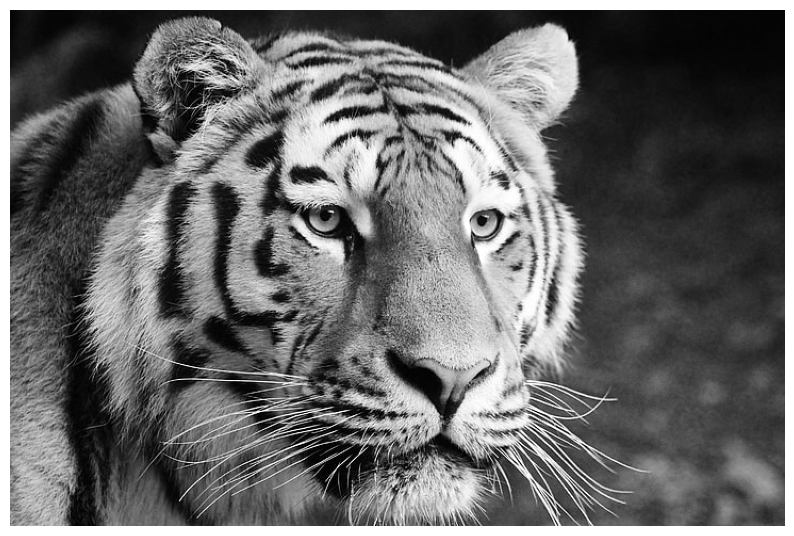

In [16]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)  # Ensure grayscale image is loaded

plt.figure(figsize=(10,8))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()


#### Task 2: Resize the downloaded image

- Use `cv2.resize()` to resize the image.


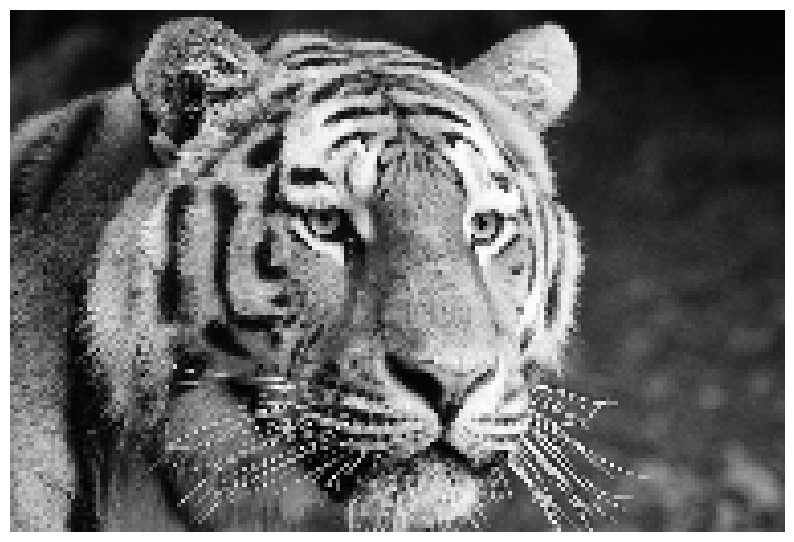

In [27]:
resized_img = cv2.resize(img,(190,128))

plt.figure(figsize=(10,8))
plt.imshow(resized_img,cmap='gray')
plt.axis('off')
plt.show()


#### Task 3: Change brightness of the downloaded image

Use the following formula:  
$$ img\_{processed} = a \cdot f(x,y) + b $$
where:

- $ f(x, y) $ is the original image (`img`) at coordinate $ (x, y) $,
- $ a $ and $ b $ are user-defined constants.


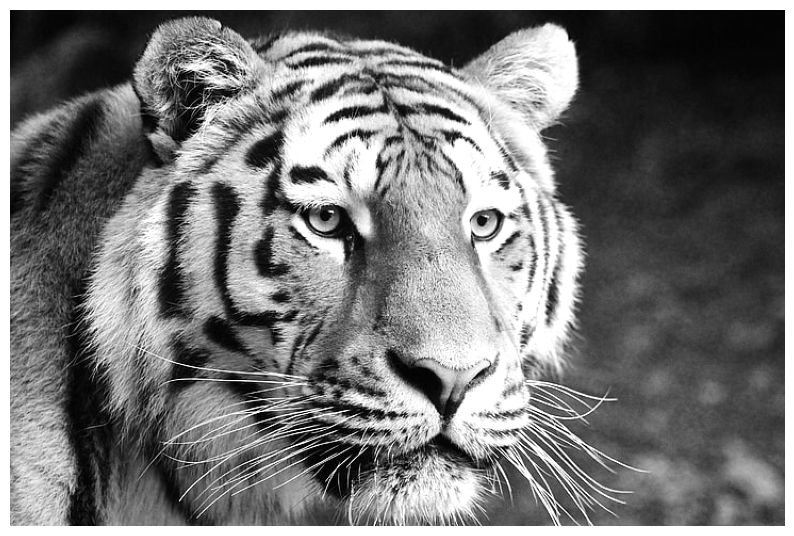

In [26]:
a = 1.1
b = 10
img_processed = a * img + b
img_processed = np.clip(img_processed, 0, 255).astype(np.uint8)
plt.figure(figsize=(10,8))
plt.imshow(img_processed,cmap='gray')
plt.axis("off")
plt.show()


#### Task 4: Histogram Equalization

- Calculate and display the histogram of the original image using `cv2.calcHist()`.
- Use `cv2.equalizeHist()` to calculate the new equalized image.
- Display the equalized histogram.


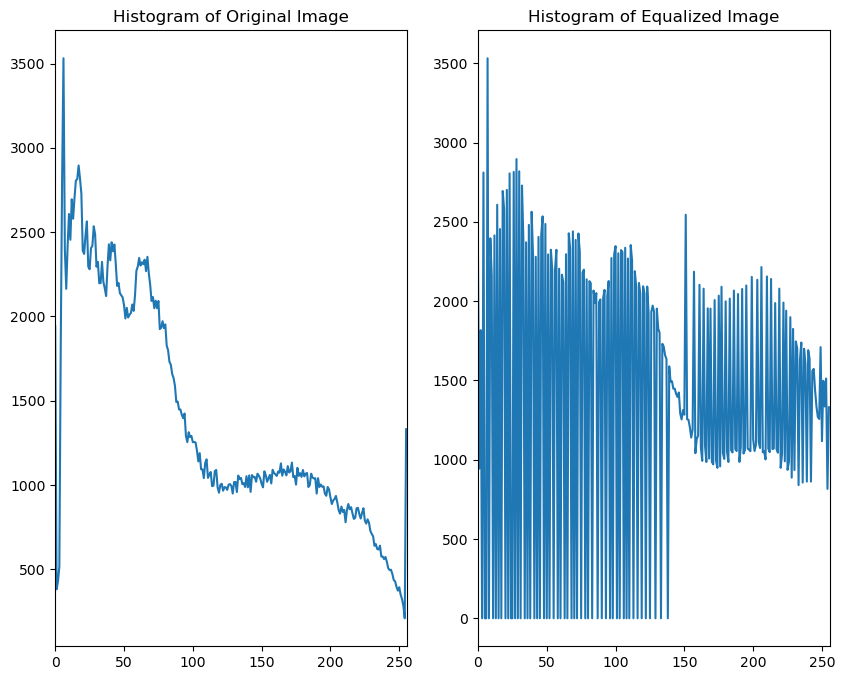

In [23]:
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])

# Apply histogram equalization
img_equalized = cv2.equalizeHist(img)

# Calculate the histogram of the equalized image
hist_equalized = cv2.calcHist([img_equalized], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 8))

# Original histogram
plt.subplot(1, 2, 1)
plt.plot(hist_original)
plt.title("Histogram of Original Image")
plt.xlim([0, 256])

# Equalized histogram
plt.subplot(1, 2, 2)
plt.plot(hist_equalized)
plt.title("Histogram of Equalized Image")
plt.xlim([0, 256])

plt.show()

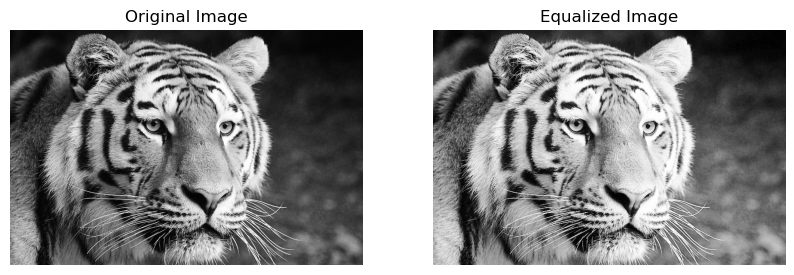

In [25]:
plt.figure(figsize=(10, 8))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(img_equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.show()


#### Task 5: Image Thresholding

- Load an image and display it. If the chosen image is color, convert it to grayscale before displaying.
- Apply the global thresholding technique to binarize the image.
- Display the binarized image.
